<a href="https://colab.research.google.com/github/9C0c0/H-C-M-Y-X-L-NH/blob/main/Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving fruit.jpg to fruit.jpg


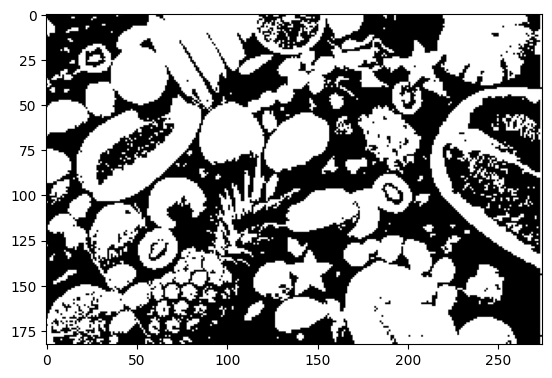

In [4]:
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pylab as plt
from skimage.filters.thresholding import threshold_otsu

data = Image.open('fruit.jpg').convert('L')
a = np.asarray(data)
thres = threshold_otsu(a)
b = a > thres
b = Image.fromarray(b)

plt.imshow(b)
plt.show()


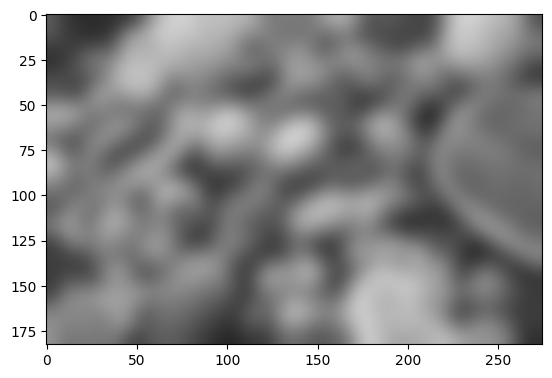

In [5]:
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pylab as plt
from skimage.filters import threshold_local

data = Image.open('fruit.jpg').convert('L')
a = np.asarray(data)
b = threshold_local(a, 39, offset=10)
b = Image.fromarray(b)

plt.imshow(b)
plt.show()


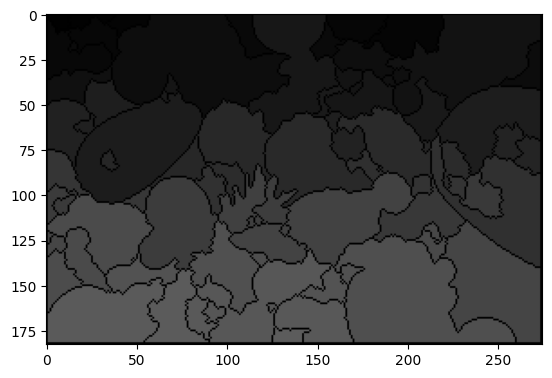

In [6]:
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local

data = cv2.imread('fruit.jpg')
a = cv2.cvtColor(data, cv2.COLOR_BGR2GRAY)
thresh, b1 = cv2.threshold(a, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
b2 = cv2.erode(b1, None, iterations=2)
dist_trans = cv2.distanceTransform(b2, 2, 3)
thresh, dt = cv2.threshold(dist_trans, 1, 255, cv2.THRESH_BINARY)
labelled, ncc = label(dt)
labelled = labelled.astype(np.int32)
cv2.watershed(data, labelled)
b = Image.fromarray(labelled)

plt.imshow(b)
plt.show()


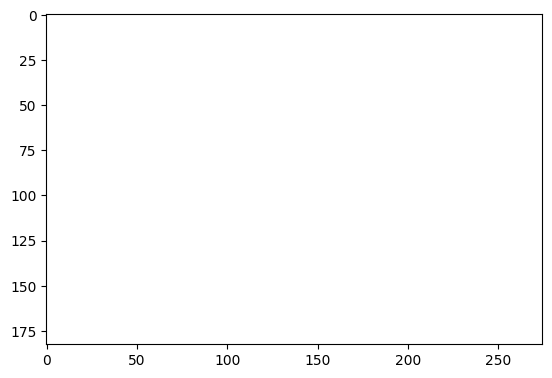

In [8]:
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pylab as plt
from scipy.ndimage import label
from skimage.filters import threshold_local

data = Image.open('fruit.jpg').convert('L')
b = nd.binary_dilation(data, iterations=50)

c = Image.fromarray(b)
c.show()
plt.imshow(c)
plt.show()


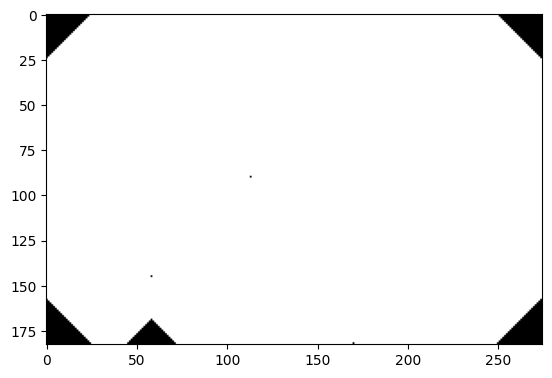

In [9]:
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pylab as plt
from scipy.ndimage import label
from skimage.filters import threshold_local

# opening the image and converting it to grayscale
data = Image.open('fruit.jpg').convert('L')
s = [[0, 1, 0], [1, 1, 1], [0, 1, 0]]
b = nd.binary_opening(data, structure=s, iterations=25)

c = Image.fromarray(b)
c.show()
plt.imshow(c)
plt.show()


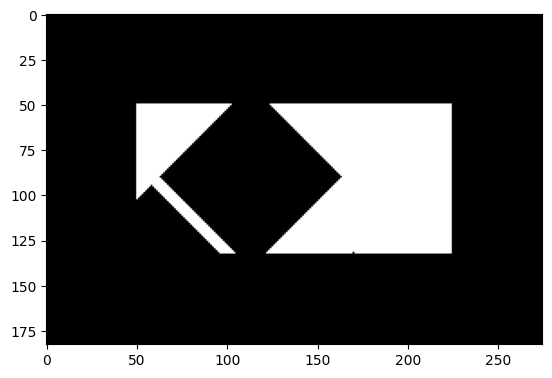

In [11]:
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local

# opening the image and converting it to grayscale
data = Image.open('fruit.jpg').convert('L')
s = [[0, 1, 0], [1, 1, 1], [0, 1, 0]]
b = nd.binary_erosion(data, structure=s, iterations=50)

c = Image.fromarray(b)
c.show()
plt.imshow(c)
plt.show()


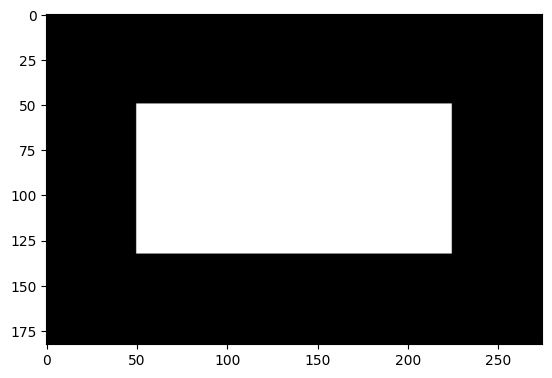

In [12]:
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local

# opening the image and converting it to grayscale
data = Image.open('fruit.jpg').convert('L')

# defining the structuring element
s = [[0, 1, 0], [1, 1, 1], [0, 1, 0]]
b = nd.binary_closing(data, structure=s, iterations=50)

c = Image.fromarray(b)
c.show()
plt.imshow(c)
plt.show()


In [16]:
import cv2

def bai1_lang_biang():
    # Đọc ảnh thang xám
    img = cv2.imread("exercise/lang_biang.jpg", cv2.IMREAD_GRAYSCALE)
    if img is None:
        print("Không tìm thấy ảnh lang_biang.jpg")
        return

    # Cắt vùng chọn: chiều cao 100px từ trên xuống
    roi = img[:100, :]

    # Phân vùng bằng phương pháp Otsu
    _, binary = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Lưu ảnh kết quả
    cv2.imwrite("output/lang_biang_out.jpg", binary)

    # Hiển thị kết quả
    cv2.imshow("LangBiang Otsu", binary)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


In [17]:
def process_ho_xuan_huong():
    img = cv2.imread("exercise/ho_xuan_huong.jpg", cv2.IMREAD_GRAYSCALE)

    # Xoay ảnh 60 độ quanh tâm ảnh
    angle = 60
    (h, w) = img.shape[:2]
    center = (w // 2, h // 2)
    rot_mat = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(img, rot_mat, (w, h))

    # Adaptive threshold
    thresh = cv2.adaptiveThreshold(rotated, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY, 11, 2)

    cv2.imwrite("ho_xuan_huong_out.jpg", thresh)
    cv2.imshow("Ho Xuan Huong", thresh)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


In [18]:
def process_quang_truong():
    img = cv2.imread("exercise/quang_truong_lam_vien.jpg", cv2.IMREAD_GRAYSCALE)

    # Coordinate Mapping (negative transformation as example)
    mapped = 255 - img

    # Binary Closing
    _, binary = cv2.threshold(mapped, 127, 255, cv2.THRESH_BINARY)
    kernel = np.ones((5,5),np.uint8)
    closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

    cv2.imwrite("quang_truong_out.jpg", closed)
    cv2.imshow("Quang Truong Lam Vien", closed)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


In [ ]:
def coordinate_mapping():
    path = input("Nhập đường dẫn ảnh: ")
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print("Không tìm thấy ảnh.")
        return
    mapped = 255 - img
    cv2.imshow("Coordinate Mapping (Negative)", mapped)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

def rotate_image():
    path = input("Nhập đường dẫn ảnh: ")
    angle = int(input("Nhập góc xoay: "))
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print("Không tìm thấy ảnh.")
        return
    h, w = img.shape
    M = cv2.getRotationMatrix2D((w//2, h//2), angle, 1.0)
    rotated = cv2.warpAffine(img, M, (w, h))
    cv2.imshow("Rotated", rotated)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

def scale_image():
    path = input("Nhập đường dẫn ảnh: ")
    fx = float(input("Tỉ lệ scale chiều ngang (fx): "))
    fy = float(input("Tỉ lệ scale chiều dọc (fy): "))
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print("Không tìm thấy ảnh.")
        return
    scaled = cv2.resize(img, None, fx=fx, fy=fy)
    cv2.imshow("Scaled", scaled)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

def shift_image():
    path = input("Nhập đường dẫn ảnh: ")
    dx = int(input("Dịch ngang (dx): "))
    dy = int(input("Dịch dọc (dy): "))
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print("Không tìm thấy ảnh.")
        return
    h, w = img.shape
    M = np.float32([[1, 0, dx], [0, 1, dy]])
    shifted = cv2.warpAffine(img, M, (w, h))
    cv2.imshow("Shifted", shifted)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# SEGMENT
def adaptive_thresholding():
    path = input("Nhập đường dẫn ảnh: ")
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print("Không tìm thấy ảnh.")
        return
    result = cv2.adaptiveThreshold(img, 255,
                                   cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY, 11, 2)
    cv2.imshow("Adaptive Thresholding", result)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

def binary_dilation():
    path = input("Nhập đường dẫn ảnh: ")
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    _, binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    kernel = np.ones((3,3), np.uint8)
    dilated = cv2.dilate(binary, kernel, iterations=1)
    cv2.imshow("Binary Dilation", dilated)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

def binary_erosion():
    path = input("Nhập đường dẫn ảnh: ")
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    _, binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    kernel = np.ones((3,3), np.uint8)
    eroded = cv2.erode(binary, kernel, iterations=1)
    cv2.imshow("Binary Erosion", eroded)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# MENU
def main():
    while True:
        print("\nChọn chức năng xử lý ảnh:")
        print("1. geometric_transformation")
        print("   a. coordinate_mapping")
        print("   b. Rotate")
        print("   c. Scale")
        print("   d. Shift")
        print("2. segment")
        print("   e. Adaptive thresholding")
        print("   f. Binary dilation")
        print("   g. Binary erosion")
        print("3. Bài 1 - LangBiang (Otsu)")
        print("4. Bài 2 - Ho Xuan Huong (Rotate + Adaptive)")
        print("5. Bài 3 - Quang Truong Lam Vien (Mapping + Closing)")
        print("0. Thoát")
        choice = input("Nhập lựa chọn: ").lower()

        if choice == "1a" or choice == "a":
            coordinate_mapping()
        elif choice == "1b" or choice == "b":
            rotate_image()
        elif choice == "1c" or choice == "c":
            scale_image()
        elif choice == "1d" or choice == "d":
            shift_image()
        elif choice == "2e" or choice == "e":
            adaptive_thresholding()
        elif choice == "2f" or choice == "f":
            binary_dilation()
        elif choice == "2g" or choice == "g":
            binary_erosion()
        elif choice == "3":
            bai1_lang_biang()
        elif choice == "4":
            bai2_ho_xuan_huong()
        elif choice == "5":
            bai3_quang_truong()
        elif choice == "0":
            print("Thoát chương trình.")
            break
        else:
            print("Lựa chọn không hợp lệ.")

if __name__ == "__main__":
    main()


Chọn chức năng xử lý ảnh:
1. geometric_transformation
   a. coordinate_mapping
   b. Rotate
   c. Scale
   d. Shift
2. segment
   e. Adaptive thresholding
   f. Binary dilation
   g. Binary erosion
3. Bài 1 - LangBiang (Otsu)
4. Bài 2 - Ho Xuan Huong (Rotate + Adaptive)
5. Bài 3 - Quang Truong Lam Vien (Mapping + Closing)
0. Thoát
Nhập lựa chọn: 1a
